# AFM Script - supplementary notebook
Author: Simeon Hatzopoulos

This notebook is part of the Simulating AFM project. Here the user can create their own shapes that will be imaged. The following shape is written in the format that is best compatibale with the AFM code. The result of this code should be a CSV file with the coordinates on the surface of the shape. 

In [7]:
%matplotlib notebook
import numpy as np     
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import nglview as nv
from numpy import random
import math

In [8]:
# sphere plotting function
def smallsphere(r, ctr_xyz):
    '''this plots a sphere or raidus r around the center ctr_xyz'''
    c_x, c_y, c_z = ctr_xyz #unpacking coordinates 
    u, v = np.mgrid[0:2 * np.pi:20j, 0:np.pi:20j]
    
    #parametric sphere 
    x = r*(np.cos(u) * np.sin(v)) + c_x
    y = r*(np.sin(u) * np.sin(v)) + c_y
    z = r*np.cos(v) + c_z
    ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r)
    
    #creating a dataframe of the coordinates
    x_flat = x.flatten()
    y_flat = y.flatten()
    z_flat = z.flatten()
 
    return x_flat, y_flat, z_flat

<IPython.core.display.Javascript object>


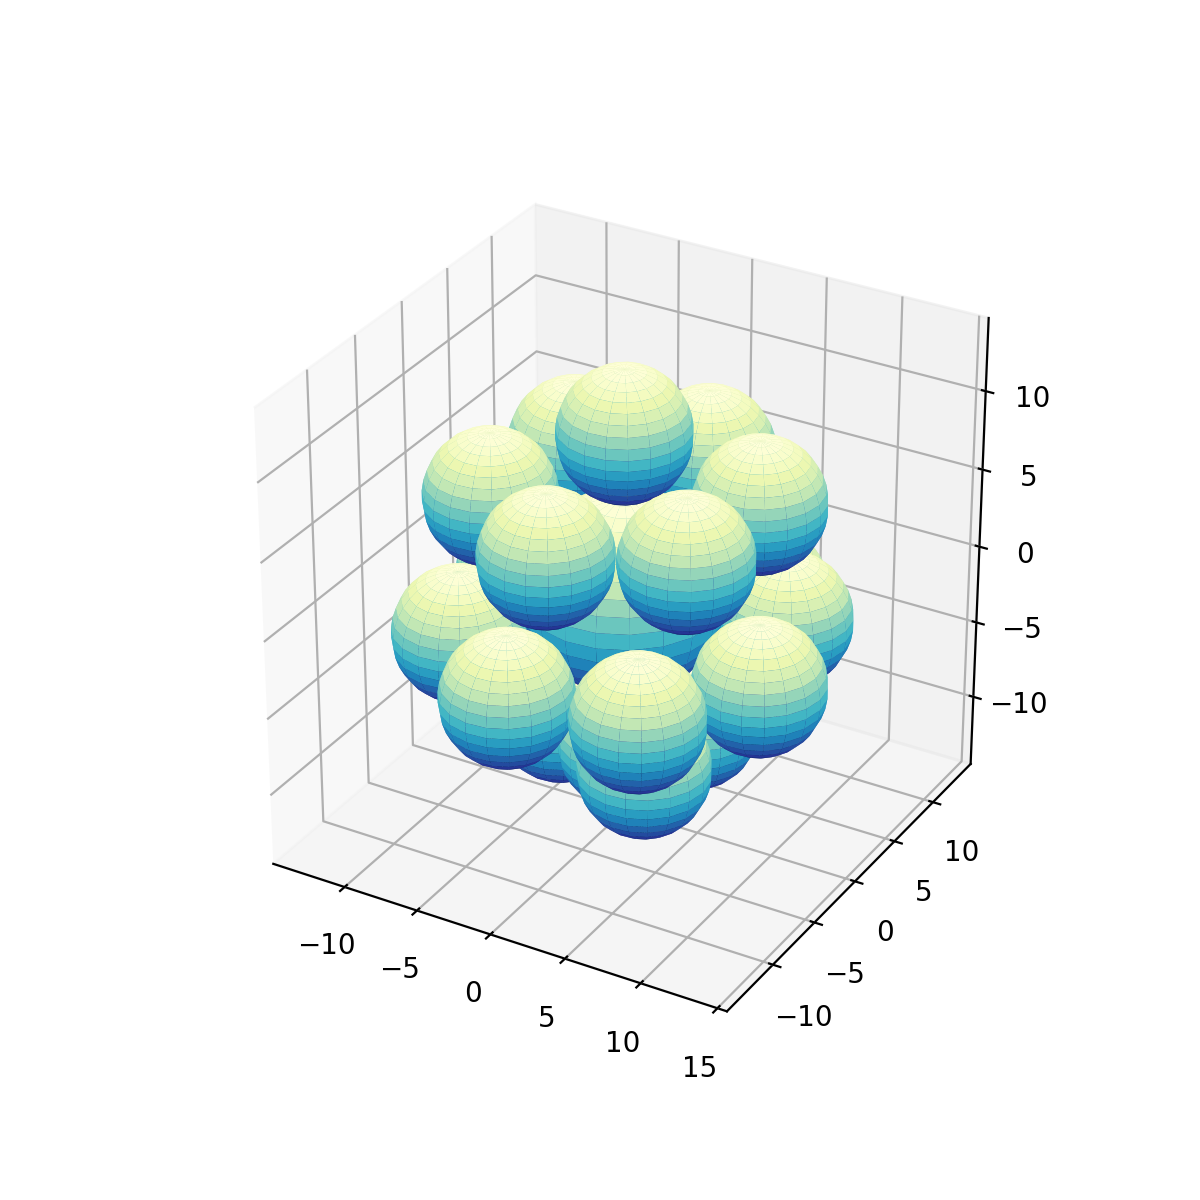

(3, 7600)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in arccos


In [10]:
# generic version 
# User can input large raidus R and small radius r

R = 6
r = 4

# graphing big sphere 
fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(projection='3d')
smallsphere(R,[0,0,0])

#top and bottomg spheres
x_top, y_top, z_top  = smallsphere(r, [0,0,R+r])
x_bot, y_bot, z_bot  = smallsphere(r, [0,0,-(R+r)])

angle1 = np.arccos((2*r**2 - 2*R**2 - 4*R*r)/(-2*(R+r)**2)) #the angle to the z-axis with smallsphere centre
#L1 = (R+r)*np.sin(angle) #vertical distance between smallspheres 
#rings = int(round(((np.pi*R)/L1),0)) #number of rings possible 
spint = math.floor((2*np.pi)/angle1) #number of spheres in the ring 
gapang = (2*np.pi - spint*angle1)/spint #angle additional to make spheres equally space 
angle = angle1 + gapang #adding angles and gap 

#creating empty arrays of coordinates 
X = [x_top, x_bot]
Y = [y_top, y_bot]
Z = [z_top, z_bot]

for n in range(spint):
    #a loop of all rings being plotted 
    z_prime = (R+r)*np.cos(n*angle) #the z-pos of the spheres
    L = (R+r)*np.sin(n*angle) #vertical distance between spheres
    phi = np.arccos((4*r**2 - 2*L**2)/(-2*L**2)) #xy-plane angle between spheres in ring

    #a loop of each sphere being plotted within a ring 
    ring_no = int(round(((2*np.pi*L)/(2*r)),0)) #number of spheres in ring
    
    k = 1
    
    while k <= ring_no:
        xarr, yarr, zarr = smallsphere(r,[L*np.sin(k*phi),L*np.cos(k*phi),(R+r)*np.cos(n*angle + gapang)])
        
        #chaning arrays to lists and then appending the lists 
        xlist = xarr.tolist()
        X.append(xlist)
        ylist = yarr.tolist()
        Y.append(ylist)
        zlist = zarr.tolist()
        Z.append(zlist)
        
        k = k + 1 #while-loop index
    
#flattening the lists 
X = [item for items in X for item in items]
Y = [item for items in Y for item in items]
Z = [item for items in Z for item in items]
    
#formatting into a csv file
data_lst = [X, Y, Z] #array of coordinates
data_arr = np.array(data_lst)
print(np.shape(data_arr))
data_arr = np.transpose(data_arr) #transpsing the array so that columns of coordinates are created 


In [ ]:
#finally naming and exporting the csv file 
np.savetxt('football.csv', data_arr, delimiter=",")